In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


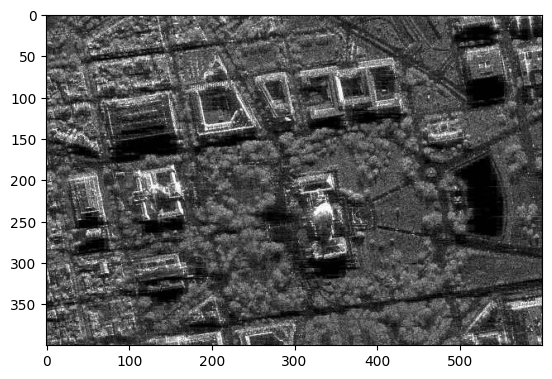

In [ ]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg.
image = cv2.imread('drive/MyDrive/hw_DE_IP/hw_1/sar_1_gray.jpg',
                   cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

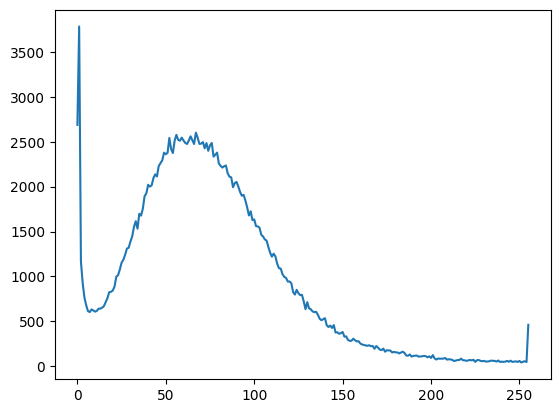

In [ ]:
# 2. Построение гистограммы
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([image], [0], None, [histSize], histRange, accumulate=accumulate)
plt.plot(b_hist)

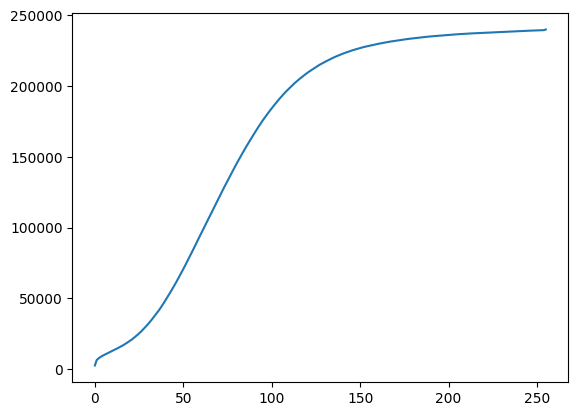

In [ ]:
b_hist_cum = b_hist.cumsum()
plt.plot(b_hist_cum)

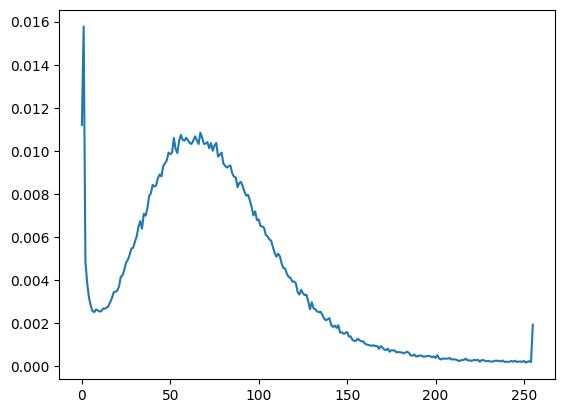

In [ ]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])
plt.plot(b_hist_norm)
plt.show()

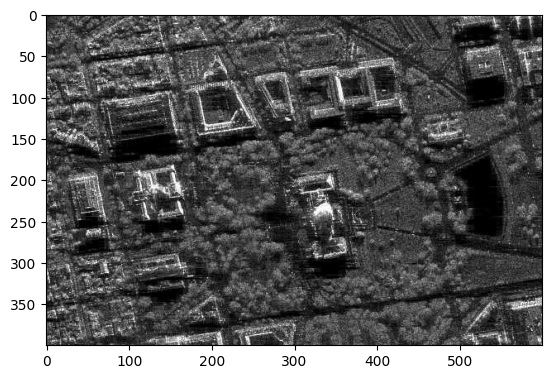

In [ ]:
# 3. Реализация алгоритма гамма-коррекции с параметром гамма <1, >1
def gamma_filtr(img, gamma_cof):
  corrected_image = np.power(image, gamma_cof)
  return corrected_image

corrected_image = gamma_filtr(image, 1.1)
plt.imshow(corrected_image, cmap='gray')
plt.show()

In [ ]:
# 4. Сравнение исходного изображения и скорректированного при помощи гамма-фильтра. MSE, SSIM
from skimage.metrics import mean_squared_error, structural_similarity
mse = mean_squared_error(image, corrected_image)
ssim = structural_similarity(image, corrected_image)

print('MSE: ', mse)
print('SSIM: ', ssim)

MSE:  2785.392973984626
SSIM:  0.806440706926897


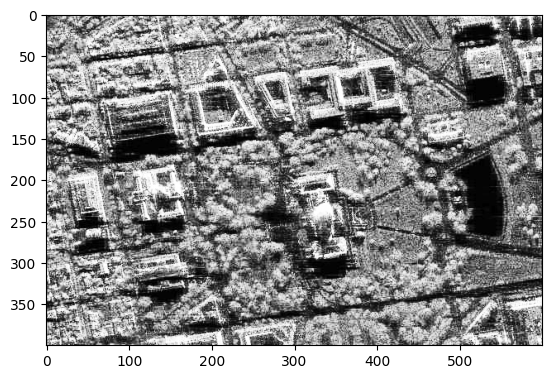

In [ ]:
# 5. Реализация алгоритма статистической цветокоррекции на основе статистики eq_gray
eq_gray = cv2.equalizeHist(image)
plt.imshow(eq_gray, cmap="gray")
plt.show()

In [ ]:
#мусор для меня
def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)

    for i in range(len(imgs)):
        #img = T.ToPILImage()(imgs[i])
        axs[0, i].imshow(np.asarray(imgs[i]), cmap='gray')
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

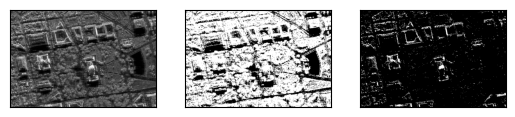

In [ ]:
# 6. Протестировать работу алгоритмов пороговой фильтрации с различными параметрами
_, threshold1 = cv2.threshold(image, 50, 150, cv2.THRESH_BINARY)
_, threshold2 = cv2.threshold(image, 150, 250, cv2.THRESH_BINARY)

show([image, threshold1, threshold2])